# Credit Card Fraud

Logistic Regression

    
 

In [4]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import scale
import random
from imblearn.over_sampling import SMOTE

This code reads in a CSV file called 'creditcard.csv' and assigns it to the variable 'df'. The 'low_memory' parameter is set to 'False' to ensure that the file is read in correctly even if it contains a large number of columns.
Then it will shuffle the dataframe using sample(frac=1) and reset the index to start from 0 using reset_index(drop=True)
Finally it will display the first five rows of the dataframe using the .head() method.

In [5]:
df = pd.read_csv('creditcard.csv', low_memory=False)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,147240.0,-1.099000,1.163033,-0.914269,-2.003475,2.321801,3.646238,-0.380261,1.275829,0.770749,...,-0.264311,-0.760298,0.028374,0.554636,-0.121590,-0.293764,-0.291709,-0.130818,1.54,0
1,161508.0,-0.252461,0.980735,-2.284579,-2.225591,3.561791,2.736905,1.065422,0.619643,-0.363574,...,0.211881,0.778010,-0.194050,0.750964,-0.220079,0.114045,0.521949,0.321314,1.46,0
2,132606.0,-0.226797,0.931993,0.411226,1.001406,0.843746,-0.885090,1.429655,-0.339659,-0.664843,...,0.158903,0.821787,-0.206079,0.479544,-0.124792,-0.452670,0.257994,0.017247,22.65,0
3,156172.0,-0.221055,2.037431,-0.094456,5.154341,0.477424,-0.112493,0.106307,0.557240,-1.953440,...,-0.687058,-2.076952,0.209678,-0.321799,0.240885,0.000254,-0.031164,-0.235185,37.70,0
4,139420.0,-0.745615,1.008571,2.024826,1.073736,0.217965,0.160338,0.573487,0.158481,-0.004324,...,-0.554023,-1.250630,-0.160856,-0.145272,0.402470,-0.776967,0.360188,0.143821,6.44,0


This code is using the pandas library to create two new dataframes, "frauds" and "non_frauds", by filtering the original dataframe "df" based on the values of the "Class" column. The first line creates a dataframe "frauds" that includes only the rows from "df" where the "Class" column is equal to 1. The second line creates a dataframe "non_frauds" that includes only the rows from "df" where the "Class" column is equal to 0. Finally, the code prints out the number of rows in each of the two new dataframes, indicating the number of fraud and non-fraud data points in the original dataframe.

In [6]:
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print("This dataset contains", len(frauds), "fraud and", len(non_frauds), "nonfraudulent data points.")

This dataset contains 492 fraud and 284315 nonfraudulent data points.


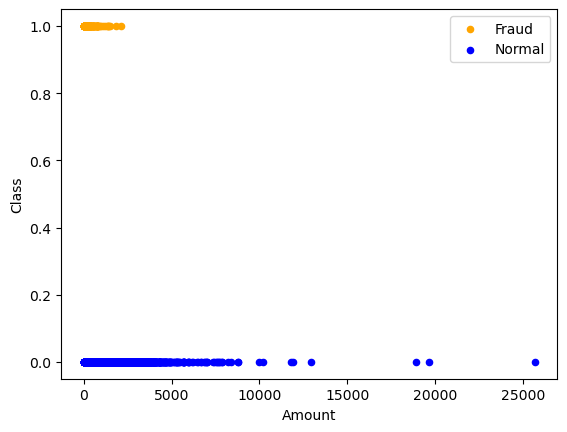

In [7]:
ax = frauds.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
non_frauds.plot.scatter(x='Amount', y='Class', color='Blue', label='Normal', ax=ax)
plt.show()

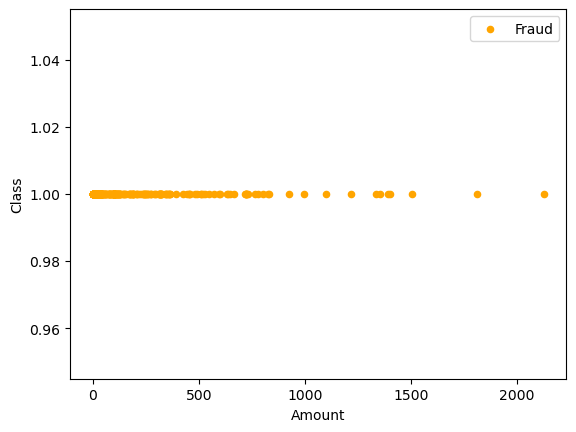

In [8]:
bx = frauds.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
plt.show()

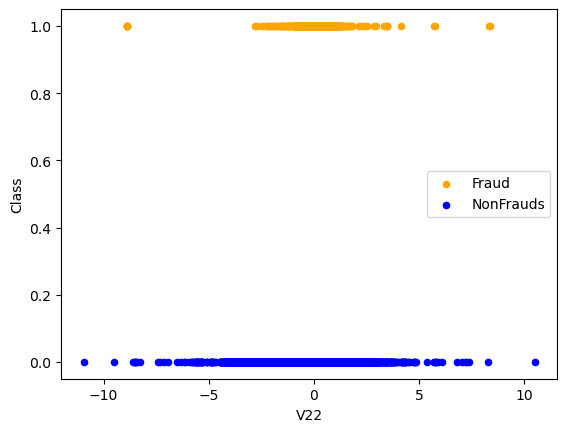

In [9]:
ax = frauds.plot.scatter(x='V22', y='Class', color='Orange', label='Fraud')
non_frauds.plot.scatter(x='V22', y='Class', color='Blue', label='NonFrauds', ax=ax)
plt.show()

# Logistic Regression

In [11]:
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

First we split df into two sets: X and y. 
Where X is assigned all columns in the DataFrame except for the last column, and y is assigned the values of the last column, 'Class'.
Next, we use the train_test_split function to split X and y into training and testing sets, with a test size of 35%. The sizes of the training and test sets are printed.

In [12]:
X = df.iloc[:,:-1]
y = df['Class']

print("x size", len(X),"and y size:", len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)
print("Train size: ",len(X_train),"|", len(y_train)," and test size:", len(X_test),"|",len(y_test))
print("Total number of frauds:", len(y.loc[df['Class'] == 1]))
print("Number of frauds on y_test:", len(y_test.loc[df['Class'] == 1]))
print("Number of frauds on y_train:", len(y_train.loc[df['Class'] == 1]))

x size 284807 and y size: 284807
Train size:  185124 | 185124  and test size: 99683 | 99683
Total number of frauds: 492
Number of frauds on y_test: 162
Number of frauds on y_train: 330


Here we chose to train a Logistic regressor model with a regularization value of c=1e5 cuz it gives higher accuracy (99%) whilst lower or higher give <98%

In [13]:
log = linear_model.LogisticRegression(C=1e6)
log.fit(X_train, y_train)
print("Score: ", log.score(X_test, y_test))

Score:  0.9988463429070152


C:\Users\fulle\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
y_predicted = np.array(log.predict(X_test))
y_right = np.array(y_test)

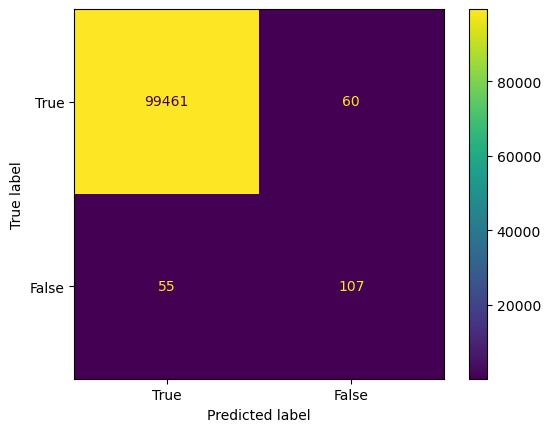

In [15]:
confusion_matrix = metrics.confusion_matrix(y_right, y_predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True, False])
cm_display.plot()
plt.show()

# Logistic Regression with SMOTE over-sampling

In [19]:
sampler = SMOTE()
X_train_sampled, y_train_sampled = sampler.fit_resample(X_train, y_train)

print("Size of training set after over sampling:", len(X_train_sampled))

Size of training set after over sampling: 369588


In [20]:
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(X_train_sampled, y_train_sampled)
print("Score: ", logistic.score(X_test, y_test))

Score:  0.985855160859926


C:\Users\fulle\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion matrix:
[[98129  1392]
 [   18   144]]


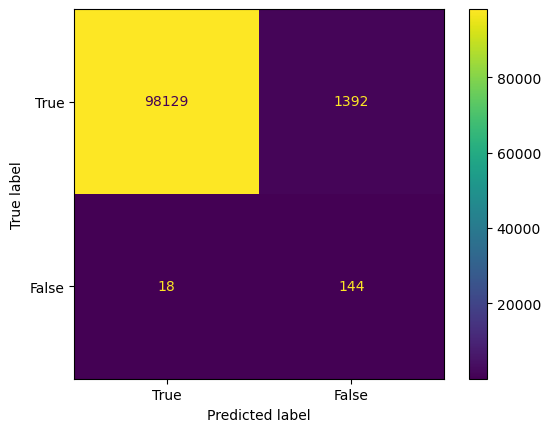

In [22]:
y_predicted1 = np.array(logistic.predict(X_test))
y_right1 = np.array(y_test)
confusion_matrix1 = metrics.confusion_matrix(y_right1, y_predicted1)
print("Confusion matrix:\n%s" % confusion_matrix1)
cm_display1 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix1, display_labels = [True, False])
cm_display1.plot()
plt.show()